# MNINST 분류기 - ANN

### 라이브러리 임포트

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [28]:
print(tf.__version__)

2.6.0


#### MNIST 데이터 로드

In [42]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### MNIST 데이터 확인

In [43]:
X_valid = X_train[55000:]
y_valid = y_train[55000:]

X_train = X_train[:55000]
y_train = y_train[:55000]

In [44]:
X_train.shape

(55000, 28, 28)

In [45]:
y_train.shape

(55000,)

In [46]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [47]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

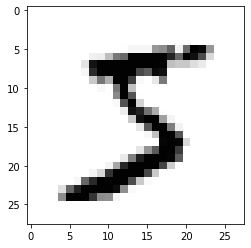

In [48]:
plt.imshow(X_train[0], cmap='Greys')

In [49]:
y_train[0]

5

### 데이터 전처리

신경망의 입력층과 출력층의 크기에 맞도록 데이터의 크기를 변경

In [50]:
X_valid

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [51]:
X_train = X_train.reshape(55000, 784).astype('float32')
X_valid = X_valid.reshape(5000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

데이터 정규화 : 입력값을 0과 1사이의 범위로 변경

In [52]:
1/255.0

0.00392156862745098

In [53]:
X_train /= 255
X_valid /= 255
X_test /= 255

In [54]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

레이블을 원핫 인코딩으로 바꾸기

In [55]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [56]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 신경망 구조 설계

In [57]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [59]:
(784*64) + 64

50240

In [60]:
(64*10) + 10

650

In [62]:
# Trainable params: 50,890
50240 + 650 

50890

### 신경망 모델 컴파일

In [63]:
model.compile(loss='mean_squared_error', 
              optimizer=SGD(learning_rate=0.01), 
              metrics=['accuracy'])

### 신경망 모델 훈련

In [64]:
model.fit(X_train, y_train, 
          batch_size=128, 
          epochs=200, 
          verbose=1, 
          validation_data=(X_valid, y_valid))

Epoch 1/200
430/430 [==============================] - 2s 3ms/step - loss: 0.0922 - accuracy: 0.1122 - val_loss: 0.0915 - val_accuracy: 0.1166
Epoch 2/200
430/430 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.1293 - val_loss: 0.0908 - val_accuracy: 0.1334
Epoch 3/200
430/430 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.1514 - val_loss: 0.0903 - val_accuracy: 0.1552
Epoch 4/200
430/430 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.1717 - val_loss: 0.0899 - val_accuracy: 0.1814
Epoch 5/200
430/430 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.1947 - val_loss: 0.0895 - val_accuracy: 0.2082
Epoch 6/200
430/430 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.2192 - val_loss: 0.0891 - val_accuracy: 0.2358
Epoch 7/200
430/430 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.2433 - val_loss: 0.0888 - val_accuracy: 0.2602

### 신경망 모델 정확도 평가 

In [65]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.8579


[0.029609331861138344, 0.8579000234603882]

In [66]:
n = 10
pred = model.predict(X_test[n].reshape(-1, 784))
print(pred)
print(np.argmax(pred))
print(y_test[n])

[[0.7974252  0.00115562 0.03129882 0.03014045 0.00414175 0.0935775
  0.00691651 0.00346909 0.03035255 0.00152245]]
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
